# Convert EWX .json file to dataframe (or .csv)

### To Do: 
1. calculate heartbeat (length b/t time intervals) for every pred. year
2. get length of yearly forecasts (to confirm hourly intervals)

### Import libraries

In [68]:
%matplotlib notebook
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
import pandas as pd
import json
import os
os.getcwd()

'C:\\Users\\wb5888\\Documents\\EWX'

In [69]:
filepath = 'C:\\Users\\wb5888\\Documents\\EWX'

def sortdir(filepath, num):
    os.chdir(filepath)
    files = np.array(os.listdir())
    time = []
    for file in files:
        sys_time = round(os.path.getmtime(filepath + "\\" + file))
        time.append(datetime.fromtimestamp(sys_time))

    time = np.array(time)
    lab = ['files']
    filedf = pd.DataFrame(files, columns = lab)

    filedf['time'] = time
    filedf = filedf.sort_values(by = 'time', axis = 0, ascending = False).reset_index(drop = True)

    print("files found in dir: ", filepath)
    print(filedf.head(num))
    return(filedf.head(num))

### Find downloaded .json file

In [70]:
filedf = sortdir(filepath, 35)

files found in dir:  C:\Users\wb5888\Documents\EWX
                                                files                time
0    20191008135608488000_NEPOOL_MECO_4081460053.json 2019-10-09 12:57:14
1                  NEPOOL_MECO_4081460053_adj_ch3.csv 2019-10-09 12:55:24
2   20191008141600609000_NEPOOL_BECO_28003830024.json 2019-10-09 09:01:41
3   20191003141600609000_NEPOOL_BECO_28003830024.json 2019-10-09 08:32:41
4                         NEPOOL_BECO_28801610016.csv 2019-10-07 10:26:25
5   20191001145800320000_NEPOOL_BECO_28801610016.json 2019-10-07 10:25:08
6             NYISO_CONED_494031226000022_year_7_.csv 2019-10-01 13:03:33
7             NYISO_CONED_494031226000022_year_8_.csv 2019-10-01 13:03:33
8             NYISO_CONED_494031226000022_year_9_.csv 2019-10-01 13:03:33
9            NYISO_CONED_494031226000022_year_10_.csv 2019-10-01 13:03:33
10                    NYISO_CONED_494031226000022.csv 2019-10-01 13:03:33
11           NYISO_CONED_494031226000022_year_11_.csv 2019-10

### Parse .json, save time & forecast values to dataframe

In [23]:
forecasts = json_parse_csv(filedf.files[0])

#forecasts2 = json_parse_csv(filedf.files[1])

loading json...
found  12 reads, creating dataset.
found  12 reads, creating dataset.
writing NEPOOL_MECO_5104393030_year_1_.csv
writing NEPOOL_MECO_5104393030_year_2_.csv
writing NEPOOL_MECO_5104393030_year_3_.csv
writing NEPOOL_MECO_5104393030_year_4_.csv
writing NEPOOL_MECO_5104393030_year_5_.csv
writing NEPOOL_MECO_5104393030_year_6_.csv
writing NEPOOL_MECO_5104393030_year_7_.csv
writing NEPOOL_MECO_5104393030_year_8_.csv
writing NEPOOL_MECO_5104393030_year_9_.csv
writing NEPOOL_MECO_5104393030_year_10_.csv
writing NEPOOL_MECO_5104393030_year_11_.csv
                     t        v
0  2019-01-01 00:00:00  1107.54
1  2019-01-01 01:00:00  1088.01
2  2019-01-01 02:00:00  1078.56
3  2019-01-01 03:00:00  1072.89
4  2019-01-01 04:00:00  1075.41
                          t         v
112880  2030-02-28 19:00:00  1219.806
112881  2030-02-28 20:00:00  1224.972
112882  2030-02-28 21:00:00  1226.484
112883  2030-02-28 22:00:00  1230.390
112884  2030-02-28 23:00:00  1234.296
saving to dataframe

In [66]:
def json_parse_csv(file):
    
    with open(file) as raw:
        print("loading json...")
        data = json.load(raw) #raw json file
        acct = data['account'] #get account data
        ch3 = acct['timeseriesdataidr'] #dictionary of acct attributes
        n = len(ch3)
        
        reads = ch3[0]['reads']
        master_df = pd.DataFrame.from_dict(reads)
        
        print('found ', n, 'reads, creating dataset.')
        
        filename = file.split('_')[1:]
        filename = '_'.join(filename)
        filename = filename.replace('.json', '.csv')
        
        reads = ch3[0]['reads']
        master_df = pd.DataFrame.from_dict(reads)
        
        print('found ', n, 'reads, creating dataset.')
        
        for i in range(1,n):
            reads = ch3[i]['reads']
            temp = pd.DataFrame.from_dict(reads)
            
            tempname = "_".join([filename.split('.')[0], 'year', str(i), '.csv'])
            print('writing {}'.format(tempname))
            
            temp.to_csv(tempname, header = True, index = False)
            master_df = pd.concat([master_df, temp]).reset_index(drop = True)
        
        print(master_df.head())
        print(master_df.tail())
        
    
        print("saving to dataframe...")
    
    print('writing file to csv')
    master_df.to_csv(filename, sep = ",", header = True, index = False)
    return(master_df)

### Plot data

In [11]:
year = [int(string.split('-')[0]) for string in forecasts.t]
year_ind = [(date < 2020) for date in year]
forecasts.iloc[0:sum(year_ind),:] .plot(x = 't', y = 'v')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


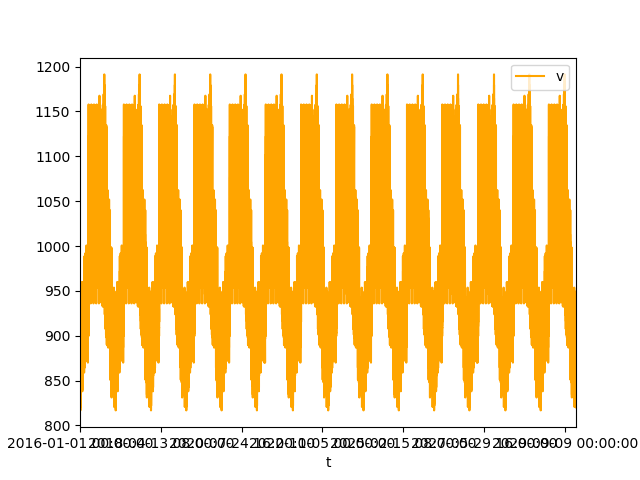

In [8]:
forecasts2.plot(x = 't', y = 'v', color = 'orange')

# Change Ingestion IDR File

### Read ingest json

In [71]:
file = filedf.files[0]

with open(file) as raw:
    print("loading json...")
    data = json.load(raw) #raw json file
    acct = data['account'] #get account data
    idr = acct['timeseriesdataidr'] #dictionary of acct attributes
        
         
reads = idr[0]['reads']
temp = pd.DataFrame.from_dict(reads)
temp.head()

loading json...


,t,v
0,2019-08-14 00:00:00,159.1875
1,2019-08-14 01:00:00,158.4
2,2019-08-14 02:00:00,159.4125
3,2019-08-14 03:00:00,159.6375
4,2019-08-14 04:00:00,161.2125


### Read new IDR file

In [73]:
new_idr = pd.read_csv(filedf.files[1])
new_idr['v'] = [str(v) for v in new_idr.v]
new_idr['t'] = pd.to_datetime(new_idr['t'])
new_idr['t'] = [str(t) for t in new_idr.t]
new_idr.head()

,t,v
0,2018-10-01 00:00:00,137.5435382
1,2018-10-01 01:00:00,134.4462969
2,2018-10-01 02:00:00,133.7383561
3,2018-10-01 03:00:00,133.63424709999998
4,2018-10-01 04:00:00,135.9662876


In [75]:
json_df = new_idr.to_json(orient = 'records')
json_df = json.loads(json_df)

idr['reads'] = json_df

### Write new ingest json

In [79]:
fp = os.path.join(path, '20191009135608488000_NEPOOL_MECO_4081460053.json')
final_json = json.dumps(data)
with open('20191009135608488000_NEPOOL_MECO_4081460053.json', 'w') as f:
    f.write(final_json)

In [78]:
filedf.files[0]

'20191008135608488000_NEPOOL_MECO_4081460053.json'